In [6]:
import os
import torch

In [7]:
if torch.backends.mps.is_available():
    print ("MPS device available.")
else:
    print ("MPS device not found.")

MPS device available.


In [8]:
os.environ["KERAS_BACKEND"] = "torch"
import keras

print(keras.__version__)

3.9.2


In [11]:
import numpy as np
from matplotlib import pyplot as plt

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Matplotlib is building the font cache; this may take a moment.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [13]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [15]:
# Model parameters
num_classes = 10
input_shape = (28, 28, 1)

In [16]:
# the model
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

In [19]:
batch_size = 128
epochs = 20

callbacks = [
    # keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

In [20]:
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)

Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - acc: 0.4420 - loss: 1.5517 - val_acc: 0.9398 - val_loss: 0.2306
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - acc: 0.8899 - loss: 0.3670 - val_acc: 0.9680 - val_loss: 0.1062
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - acc: 0.9268 - loss: 0.2500 - val_acc: 0.9702 - val_loss: 0.1072
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - acc: 0.9371 - loss: 0.2067 - val_acc: 0.9756 - val_loss: 0.0812
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - acc: 0.9470 - loss: 0.1777 - val_acc: 0.9760 - val_loss: 0.0805
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - acc: 0.9502 - loss: 0.1670 - val_acc: 0.9807 - val_loss: 0.0653
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - acc: 0.9545 - loss: 0.1577 - val_acc: 0.9797 - val_loss: 0.0687
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - acc: 0.9562 - loss: 0.1461 - val_acc: 0.9836 - val_loss: 0.0581
Epoch 9/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 

In [21]:
score = model.evaluate(x_test, y_test, verbose="0")
score

[0.06048301234841347, 0.9828000068664551]

In [22]:
# model.save("final_model.keras")
# model = keras.saving.load_model("final_model.keras")

In [23]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [24]:
np.max(predictions[2]), np.argmax(predictions[2])

(np.float32(0.99993145), np.int64(1))

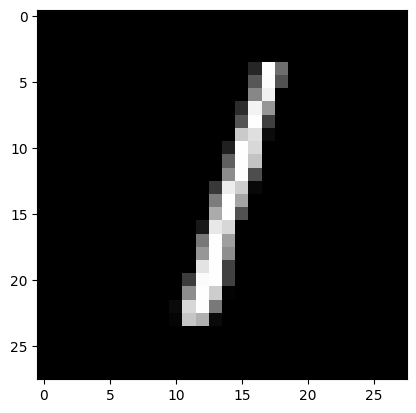

In [25]:
plt.imshow(x_test[2].squeeze(), cmap=plt.get_cmap('gray'))